In [1]:
# Import relative modules
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Go back a directory to access src
os.chdir("..")

In [3]:
from src.data_processing.house_data_converter import HouseDataConverter

hdc = HouseDataConverter("data/raw/Rhode-Island_hd.csv")
df = hdc.df
df.show()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/16 00:37:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------+--------------------+--------------------+-----+--------+-----------+-------------+
|   Price|             Address|       Rent Estimate| Beds|   Baths|     Sq. Ft|    Home Type|
+--------+--------------------+--------------------+-----+--------+-----------+-------------+
|$434,870|Ausdale Rd, Crans...|$1660/m Estimated...| NULL|    NULL|       NULL|Single-Family|
|$360,675|Curtis St, Cranst...|$1770/m Estimated...|2 bed|  2 bath|  878 sqft.|Single-Family|
|$358,697|Woburn St, Cranst...|$1520/m Estimated...|4 bed|1.5 bath|1,212 sqft.|Single-Family|
|$159,334|Delway Rd, Cranst...|$1460/m Estimated...| NULL|    NULL|       NULL|         NULL|
|$412,094|Capuano Ave, Cran...|$1820/m Estimated...|3 bed|  1 bath|1,340 sqft.|Single-Family|
|$360,355|Argyle St, Cranst...|$1400/m Estimated...|1 bed|  1 bath|1,152 sqft.|Single-Family|
|$388,097|Ashley St, Cranst...|$1770/m Estimated...|3 bed|  2 bath|1,002 sqft.|Single-Family|
|$451,096|Brettonwoods Dr, ...|$1860/m Estimated...|3 bed|1.

In [4]:
# convert the spark dataframe into a pandas dataframe
pandas_df = df.toPandas()
pandas_df

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
0,"$434,870","Ausdale Rd, Cranston, RI 02910",$1660/m Estimated Rental Value,None,None,None,Single-Family
1,"$360,675","Curtis St, Cranston, RI 02920",$1770/m Estimated Rental Value,2 bed,2 bath,878 sqft.,Single-Family
2,"$358,697","Woburn St, Cranston, RI 02910",$1520/m Estimated Rental Value,4 bed,1.5 bath,"1,212 sqft.",Single-Family
3,"$159,334","Delway Rd, Cranston, RI 02910",$1460/m Estimated Rental Value,None,None,None,None
4,"$412,094","Capuano Ave, Cranston, RI 02920",$1820/m Estimated Rental Value,3 bed,1 bath,"1,340 sqft.",Single-Family
...,...,...,...,...,...,...,...
798,"$332,542","Ruskin Ave, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1 bath,"1,344 sqft.",Single-Family
799,None,"Summit St Apt 3, Woonsocket, RI 02895",*Rental Value Coming Soon,None,None,None,None
800,"$386,676","Winter St, Woonsocket, RI 02895",$1160/m Estimated Rental Value,4 bed,1.5 bath,0 sqft.,Single-Family
801,"$326,835","Roberts St, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1.5 bath,988 sqft.,Single-Family


In [5]:
# Start EDA using pandas_df

# Drop duplicates
dropped_df = pandas_df.drop_duplicates()
dropped_df

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
0,"$434,870","Ausdale Rd, Cranston, RI 02910",$1660/m Estimated Rental Value,None,None,None,Single-Family
1,"$360,675","Curtis St, Cranston, RI 02920",$1770/m Estimated Rental Value,2 bed,2 bath,878 sqft.,Single-Family
2,"$358,697","Woburn St, Cranston, RI 02910",$1520/m Estimated Rental Value,4 bed,1.5 bath,"1,212 sqft.",Single-Family
3,"$159,334","Delway Rd, Cranston, RI 02910",$1460/m Estimated Rental Value,None,None,None,None
4,"$412,094","Capuano Ave, Cranston, RI 02920",$1820/m Estimated Rental Value,3 bed,1 bath,"1,340 sqft.",Single-Family
...,...,...,...,...,...,...,...
798,"$332,542","Ruskin Ave, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1 bath,"1,344 sqft.",Single-Family
799,None,"Summit St Apt 3, Woonsocket, RI 02895",*Rental Value Coming Soon,None,None,None,None
800,"$386,676","Winter St, Woonsocket, RI 02895",$1160/m Estimated Rental Value,4 bed,1.5 bath,0 sqft.,Single-Family
801,"$326,835","Roberts St, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1.5 bath,988 sqft.,Single-Family


In [6]:
# Drop NA
dropped_df = dropped_df.dropna()
dropped_df

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
1,"$360,675","Curtis St, Cranston, RI 02920",$1770/m Estimated Rental Value,2 bed,2 bath,878 sqft.,Single-Family
2,"$358,697","Woburn St, Cranston, RI 02910",$1520/m Estimated Rental Value,4 bed,1.5 bath,"1,212 sqft.",Single-Family
4,"$412,094","Capuano Ave, Cranston, RI 02920",$1820/m Estimated Rental Value,3 bed,1 bath,"1,340 sqft.",Single-Family
5,"$360,355","Argyle St, Cranston, RI 02920",$1400/m Estimated Rental Value,1 bed,1 bath,"1,152 sqft.",Single-Family
6,"$388,097","Ashley St, Cranston, RI 02920",$1770/m Estimated Rental Value,3 bed,2 bath,"1,002 sqft.",Single-Family
...,...,...,...,...,...,...,...
797,"$297,777","Bailey St, Woonsocket, RI 02895",$1301/m Estimated Rental Value,3 bed,2 bath,"1,333 sqft.",Single-Family
798,"$332,542","Ruskin Ave, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1 bath,"1,344 sqft.",Single-Family
800,"$386,676","Winter St, Woonsocket, RI 02895",$1160/m Estimated Rental Value,4 bed,1.5 bath,0 sqft.,Single-Family
801,"$326,835","Roberts St, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1.5 bath,988 sqft.,Single-Family


24/06/16 00:38:02 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [7]:
dropped_df["Price"].unique()

array(['$360,675', '$358,697', '$412,094', '$360,355', '$388,097',
       '$451,096', '$241,805', '$431,167', '$396,598', '$414,838',
       '$458,244', '$223,000', '$430,694', '$610,372', '$286,656',
       '$351,000', '$260,525', '$686,914', '$439,000', '$326,024',
       '$326,607', '$394,000', '$440,511', '$526,391', '$402,259',
       '$448,800', '$374,148', '$271,200', '$639,534', '$395,901',
       '$323,303', '$448,005', '$377,673', '$606,800', '$563,418',
       '$376,747', '$475,200', '$345,562', '$453,200', '$355,312',
       '$383,809', '$265,800', '$421,545', '$383,139', '$350,845',
       '$189,922', '$145,520', '$240,945', '$237,576', '$185,956',
       '$203,674', '$206,097', '$204,885', '$244,205', '$200,601',
       '$170,765', '$250,665', '$242,335', '$198,088', '$283,543',
       '$225,845', '$244,545', '$341,081', '$274,720', '$213,238',
       '$212,926', '$245,310', '$194,903', '$280,000', '$202,215',
       '$260,462', '$221,935', '$256,870', '$189,890', '$170,9

In [8]:
dropped_df["Address"].unique()

array(['Curtis St, Cranston, RI 02920', 'Woburn St, Cranston, RI 02910',
       'Capuano Ave, Cranston, RI 02920', 'Argyle St, Cranston, RI 02920',
       'Ashley St, Cranston, RI 02920',
       'Brettonwoods Dr, Cranston, RI 02920',
       'Pippin St, Cranston, RI 02920',
       'Hawthorne Ave, Cranston, RI 02910',
       'Eliot Rd, Cranston, RI 02910', 'Burdick Dr, Cranston, RI 02920',
       'Quail Hollow Rd, Cranston, RI 02920',
       'Whipple Ave, Cranston, RI 02920',
       'Old Spring Rd, Cranston, RI 02920',
       'Phenix Ave, Cranston, RI 02921',
       'Fletcher Ave, Cranston, RI 02920',
       'Albert Ave, Cranston, RI 02905', 'N View Ave, Cranston, RI 02920',
       'Fox Ridge Dr, Cranston, RI 02921',
       'Weston Ave, Cranston, RI 02920',
       'Chestnut Ave, Cranston, RI 02910',
       'Midland Dr, Cranston, RI 02920',
       'Kimberly Ln N, Cranston, RI 02921',
       'Roslyn Ave, Cranston, RI 02910',
       'Ferncrest Ave, Cranston, RI 02905',
       'Bracken St, C

In [9]:
dropped_df["Rent Estimate"].unique()

array(['$1770/m Estimated Rental Value', '$1520/m Estimated Rental Value',
       '$1820/m Estimated Rental Value', '$1400/m Estimated Rental Value',
       '$1860/m Estimated Rental Value', '$1630/m Estimated Rental Value',
       '$1680/m Estimated Rental Value', '$1550/m Estimated Rental Value',
       '$1830/m Estimated Rental Value', '$2020/m Estimated Rental Value',
       '$1610/m Estimated Rental Value', '$1840/m Estimated Rental Value',
       '$2370/m Estimated Rental Value', '$1388/m Estimated Rental Value',
       '$1570/m Estimated Rental Value', '$2650/m Estimated Rental Value',
       '$1950/m Estimated Rental Value', '$1580/m Estimated Rental Value',
       '$1490/m Estimated Rental Value', '$1930/m Estimated Rental Value',
       '$2150/m Estimated Rental Value', '$1590/m Estimated Rental Value',
       '$1790/m Estimated Rental Value', '$1440/m Estimated Rental Value',
       '$1430/m Estimated Rental Value', '$2080/m Estimated Rental Value',
       '$1560/m Estimated

In [10]:
dropped_df[(dropped_df["Rent Estimate"] == "*Rental Value Coming Soon")]

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
78,"$189,922","Ruth St, Pawtucket, RI 02861",*Rental Value Coming Soon,2 bed,1 bath,"1,176 sqft.",Single-Family
79,"$145,520","Bloomingdale Ave, Pawtucket, RI 02860",*Rental Value Coming Soon,2 bed,1 bath,672 sqft.,Single-Family
80,"$240,945","Grotto Ave, Pawtucket, RI 02860",*Rental Value Coming Soon,3 bed,1 bath,"1,440 sqft.",Single-Family
81,"$237,576","Revere St, Pawtucket, RI 02861",*Rental Value Coming Soon,2 bed,1 bath,"1,072 sqft.",Single-Family
82,"$185,956","Lloyd St, Pawtucket, RI 02860",*Rental Value Coming Soon,2 bed,1 bath,840 sqft.,Single-Family
...,...,...,...,...,...,...,...
772,"$620,059","Shore Rd, Westerly, RI 02891",*Rental Value Coming Soon,3 bed,2 bath,"1,418 sqft.",Single-Family
773,"$207,230","Cross St, Westerly, RI 02891",*Rental Value Coming Soon,2 bed,1 bath,944 sqft.,Single-Family
774,"$240,241","Arlington St, Westerly, RI 02891",*Rental Value Coming Soon,2 bed,1.5 bath,"1,056 sqft.",Single-Family
775,"$203,320","Canal St, Westerly, RI 02891",*Rental Value Coming Soon,2 bed,1.5 bath,878 sqft.,Single-Family


In [11]:
dropped_df["Beds"].unique()

array(['2 bed', '4 bed', '3 bed', '1 bed', '7 bed', '6 bed', '8 bed',
       '9 bed', '5 bed'], dtype=object)

In [12]:
dropped_df["Baths"].unique()

array(['2 bath', '1.5 bath', '1 bath', '3 bath', '2.5 bath', '4.5 bath',
       '3.5 bath'], dtype=object)

In [13]:
dropped_df["Sq. Ft"].unique()

array(['878 sqft.', '1,212 sqft.', '1,340 sqft.', '1,152 sqft.',
       '1,002 sqft.', '1,416 sqft.', '1,248 sqft.', '1,853 sqft.',
       '1,318 sqft.', '1,296 sqft.', '1,564 sqft.', '3,263 sqft.',
       '1,034 sqft.', '2,570 sqft.', '1,125 sqft.', '3,487 sqft.',
       '1,160 sqft.', '3,063 sqft.', '2,378 sqft.', '1,326 sqft.',
       '1,040 sqft.', '2,233 sqft.', '1,200 sqft.', '1,470 sqft.',
       '1,352 sqft.', '2,048 sqft.', '1,782 sqft.', '999 sqft.',
       '1,456 sqft.', '1,751 sqft.', '1,392 sqft.', '1,440 sqft.',
       '3,658 sqft.', '1,644 sqft.', '1,267 sqft.', '1,078 sqft.',
       '1,535 sqft.', '1,800 sqft.', '1,174 sqft.', '1,664 sqft.',
       '1,092 sqft.', '1,344 sqft.', '1,584 sqft.', '1,165 sqft.',
       '1,176 sqft.', '672 sqft.', '1,072 sqft.', '840 sqft.',
       '958 sqft.', '1,009 sqft.', '1,036 sqft.', '2,280 sqft.',
       '1,008 sqft.', '964 sqft.', '1,645 sqft.', '2,340 sqft.',
       '936 sqft.', '2,464 sqft.', '1,500 sqft.', '2,122 sqft.',
       '1

In [14]:
dropped_df[dropped_df["Sq. Ft"] == "0 sqft."]

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
800,"$386,676","Winter St, Woonsocket, RI 02895",$1160/m Estimated Rental Value,4 bed,1.5 bath,0 sqft.,Single-Family


In [15]:
dropped_df["Home Type"].unique()

array(['Single-Family', 'Multi-Family', 'Condo'], dtype=object)

In [16]:
dropped_df = dropped_df[((dropped_df["Rent Estimate"] != "*Rental Value Coming Soon")) & (dropped_df["Sq. Ft"] != "0 sqft.")]
dropped_df

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
1,"$360,675","Curtis St, Cranston, RI 02920",$1770/m Estimated Rental Value,2 bed,2 bath,878 sqft.,Single-Family
2,"$358,697","Woburn St, Cranston, RI 02910",$1520/m Estimated Rental Value,4 bed,1.5 bath,"1,212 sqft.",Single-Family
4,"$412,094","Capuano Ave, Cranston, RI 02920",$1820/m Estimated Rental Value,3 bed,1 bath,"1,340 sqft.",Single-Family
5,"$360,355","Argyle St, Cranston, RI 02920",$1400/m Estimated Rental Value,1 bed,1 bath,"1,152 sqft.",Single-Family
6,"$388,097","Ashley St, Cranston, RI 02920",$1770/m Estimated Rental Value,3 bed,2 bath,"1,002 sqft.",Single-Family
...,...,...,...,...,...,...,...
795,"$348,215","Nursery Ave, Woonsocket, RI 02895",$1230/m Estimated Rental Value,3 bed,1 bath,"1,152 sqft.",Single-Family
797,"$297,777","Bailey St, Woonsocket, RI 02895",$1301/m Estimated Rental Value,3 bed,2 bath,"1,333 sqft.",Single-Family
798,"$332,542","Ruskin Ave, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1 bath,"1,344 sqft.",Single-Family
801,"$326,835","Roberts St, Woonsocket, RI 02895",$1230/m Estimated Rental Value,2 bed,1.5 bath,988 sqft.,Single-Family


In [17]:
def clean_and_convert(df):
    df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(int)
    df['Rent Estimate'] = df['Rent Estimate'].str.replace('[\$,/m Estimated Rental Value]', '', regex=True).astype(int)
    df['Beds'] = df['Beds'].str.replace(' bed', '').astype(int)
    df['Baths'] = df['Baths'].str.replace(' bath', '').astype(float)  # float to handle half baths
    df['Sq. Ft'] = df['Sq. Ft'].str.replace('[\,sqft.]', '', regex=True).astype(int)
    return df

# Apply the function to clean and convert the DataFrame
dropped_df = clean_and_convert(dropped_df)
dropped_df

/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/2055573895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(int)
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/2055573895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rent Estimate'] = df['Rent Estimate'].str.replace('[\$,/m Estimated Rental Value]', '', regex=True).astype(int)
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/2055

,Price,Address,Rent Estimate,Beds,Baths,Sq. Ft,Home Type
1,360675,"Curtis St, Cranston, RI 02920",1770,2,2.0,878,Single-Family
2,358697,"Woburn St, Cranston, RI 02910",1520,4,1.5,1212,Single-Family
4,412094,"Capuano Ave, Cranston, RI 02920",1820,3,1.0,1340,Single-Family
5,360355,"Argyle St, Cranston, RI 02920",1400,1,1.0,1152,Single-Family
6,388097,"Ashley St, Cranston, RI 02920",1770,3,2.0,1002,Single-Family
...,...,...,...,...,...,...,...
795,348215,"Nursery Ave, Woonsocket, RI 02895",1230,3,1.0,1152,Single-Family
797,297777,"Bailey St, Woonsocket, RI 02895",1301,3,2.0,1333,Single-Family
798,332542,"Ruskin Ave, Woonsocket, RI 02895",1230,2,1.0,1344,Single-Family
801,326835,"Roberts St, Woonsocket, RI 02895",1230,2,1.5,988,Single-Family


In [18]:
def extract_address(df):
    # Step 1: Split by commas
    split_df = df["Address"].str.split(",", expand = True)
    # Step 2: Trim whitespace from split parts
    split_df = split_df.apply(lambda x: x.str.strip())
    # Step 3: Split the third part (state and zip code) by space
    state_zip_split = split_df[2].str.split(" ", expand = True)
    # Assign the parts to new columns
    df["Street"] = split_df[0]
    df["City"] = split_df[1]
    df["State Label"] = state_zip_split[0]
    df["Zip Code"] = state_zip_split[1].astype(int)
    # Drop the original Address column if no longer needed
    df.drop(columns = ["Address"], inplace = True)
    return df

dropped_df = extract_address(dropped_df)
dropped_df

/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/2149092393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Street"] = split_df[0]
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/2149092393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = split_df[1]
/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/2149092393.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Price,Rent Estimate,Beds,Baths,Sq. Ft,Home Type,Street,City,State Label,Zip Code
1,360675,1770,2,2.0,878,Single-Family,Curtis St,Cranston,RI,2920
2,358697,1520,4,1.5,1212,Single-Family,Woburn St,Cranston,RI,2910
4,412094,1820,3,1.0,1340,Single-Family,Capuano Ave,Cranston,RI,2920
5,360355,1400,1,1.0,1152,Single-Family,Argyle St,Cranston,RI,2920
6,388097,1770,3,2.0,1002,Single-Family,Ashley St,Cranston,RI,2920
...,...,...,...,...,...,...,...,...,...,...
795,348215,1230,3,1.0,1152,Single-Family,Nursery Ave,Woonsocket,RI,2895
797,297777,1301,3,2.0,1333,Single-Family,Bailey St,Woonsocket,RI,2895
798,332542,1230,2,1.0,1344,Single-Family,Ruskin Ave,Woonsocket,RI,2895
801,326835,1230,2,1.5,988,Single-Family,Roberts St,Woonsocket,RI,2895


In [19]:
home_type_mapping = {
    'Single-Family': 'S',
    'Multi-Family': 'M',
    'Condo': 'C'
}

# Apply the mapping to the "Home Type" column
dropped_df['Home Type'] = dropped_df['Home Type'].map(home_type_mapping)

/var/folders/mm/cqt12vfs6m15tzv8kbj1q7_w0000gn/T/ipykernel_85327/3718522958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df['Home Type'] = dropped_df['Home Type'].map(home_type_mapping)


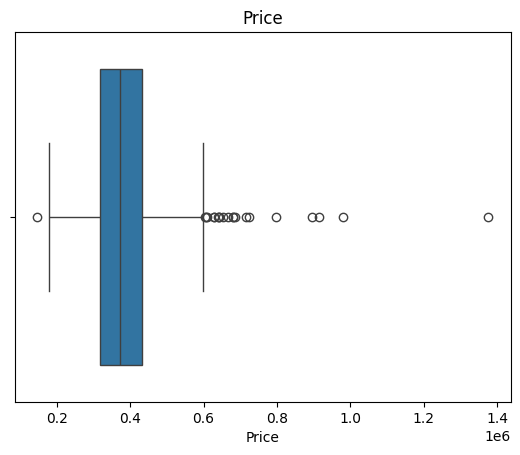

In [20]:
sns.boxplot(x = dropped_df["Price"])
plt.title("Price")
plt.show()

In [ ]:
### Changes to be made to update the dataframe and data cleaning process
# Sq. Ft:
# - Anything less than 200 Sq. Ft.
# Home Type:
# - Include SF (Single-Family), Con (Condo), MF (Multi-Family), MH (Mobile Home), Comm (Commercial)
# Beds:
# - Outliers (0)
# Bathrooms:
# - Outliers (0)